# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA as arima_new
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

from zipfile import ZipFile


In [3]:
#create a df from the zip file with name, gender and count as a column
df = pd.DataFrame()
colnames = ['name', 'gender', 'count']

# Read the zip file
with ZipFile("data/babies.zip") as temp_zip:
    for file_name in temp_zip.namelist():
        if ".txt" in file_name:
            # Read the current file from the zip
            with temp_zip.open(file_name) as temp_file:
                temp_df = pd.read_csv(temp_file, names=colnames)
                temp_df['year'] = file_name[3:7]
                df = pd.concat([df, temp_df])

df.to_csv('data/baby_names.csv', index=False)
df

,name,gender,count,year
0,Mary,F,9217,1884
1,Anna,F,3860,1884
2,Emma,F,2587,1884
3,Elizabeth,F,2549,1884
4,Minnie,F,2243,1884
...,...,...,...,...
2079,Titus,M,5,1883
2080,Toney,M,5,1883
2081,Verna,M,5,1883
2082,Winnie,M,5,1883


In [4]:
#get the column in the right format
df.year = pd.to_datetime(df.year)
df.count = df['count'].astype(int)
df = df.set_index("year")

In [5]:
df.head(5)

,name,gender,count
year,,,
1884-01-01,Mary,F,9217
1884-01-01,Anna,F,3860
1884-01-01,Emma,F,2587
1884-01-01,Elizabeth,F,2549
1884-01-01,Minnie,F,2243


<AxesSubplot:xlabel='year'>

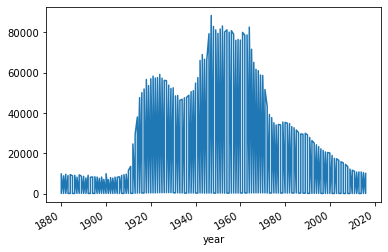

In [31]:
#visualize the data 
df['count'].loc[df.name == "John"].plot() #Newton, #Olivia

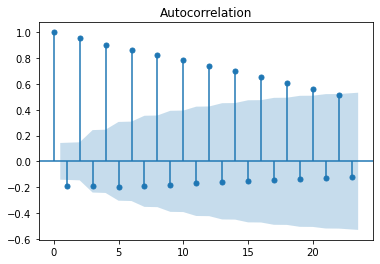

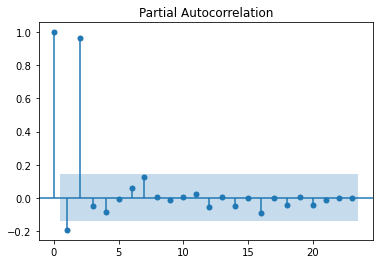

In [23]:
#1 Get the autocorrelation and partial autocorrelation for the name Olivia, Newton and John

plot_acf(df['count'].loc[df.name == "Olivia"]);
plot_pacf(df['count'].loc[df.name == "Olivia"]);

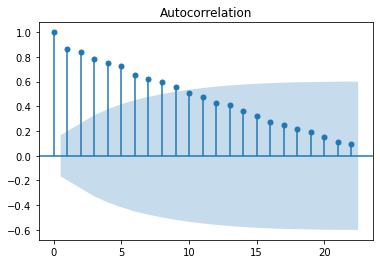

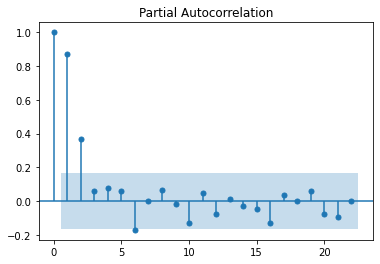

In [24]:
plot_acf(df['count'].loc[df.name == "Newton"]);
plot_pacf(df['count'].loc[df.name == "Newton"]);

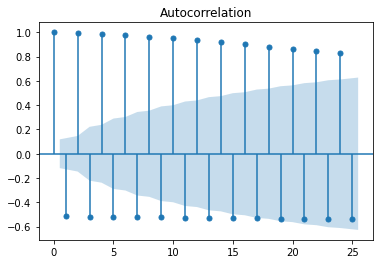

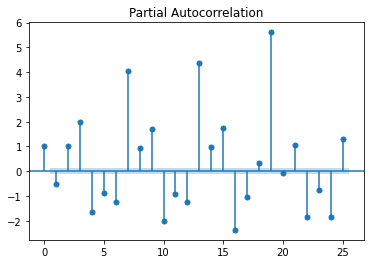

In [25]:
plot_acf(df['count'].loc[df.name == "John"]);
plot_pacf(df['count'].loc[df.name == "John"]);

In [7]:
#2 Which name do you expect to be the most popular in 2022? Use an ARIMA model and backetesting to pick 3 interesting candidates. Support your find wiht a plot. 

sorted_df = df.groupby(["name", "year"]).sum().reset_index()

In [8]:
sorted_df.year = pd.to_datetime(sorted_df.year)
sorted_df = sorted_df.set_index("year")
sorted_df.head()

,name,count
year,,
2007-01-01,Aaban,5
2009-01-01,Aaban,6
2010-01-01,Aaban,9
2011-01-01,Aaban,11
2012-01-01,Aaban,11


In [10]:
top5 = sorted_df.sort_values(["year", "count"], ascending=False).name[:5].values

In [11]:
top5

array(['Emma', 'Olivia', 'Noah', 'Liam', 'Ava'], dtype=object)

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


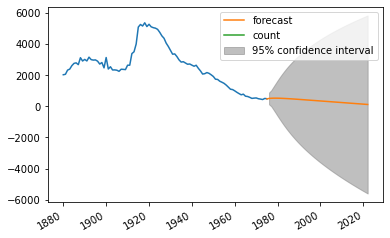

In [12]:
train_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Emma"][:96]).drop("name",axis=1) # 70% split
test_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Emma"][96:]).drop("name",axis=1)  # 30% split

model = ARIMA(train_df, order=(2, 1, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(train_df);

res.plot_predict('1975', '2022', ax=ax);

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


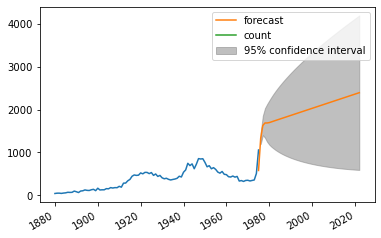

In [16]:
train_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Olivia"][:96]).drop("name",axis=1) # 70% split
test_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Olivia"][96:]).drop("name",axis=1)  # 30% split

model = ARIMA(train_df, order=(2, 1, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(train_df);

res.plot_predict('1975', '2022', ax=ax);

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


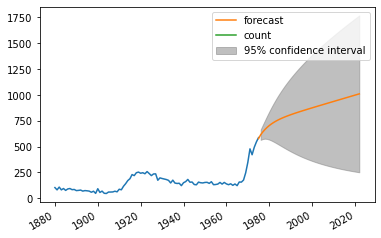

In [13]:
train_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Noah"][:96]).drop("name",axis=1) # 70% split
test_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Noah"][96:]).drop("name",axis=1)  # 30% split

model = ARIMA(train_df, order=(2, 1, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(train_df);

res.plot_predict('1975', '2022', ax=ax);



C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


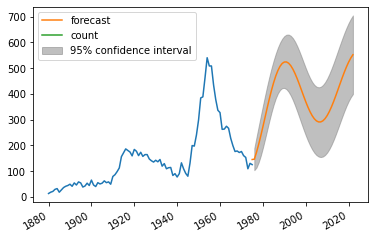

In [15]:
train_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Ava"][:96]).drop("name",axis=1) # 70% split
test_df = pd.DataFrame(sorted_df.loc[sorted_df.name == "Ava"][96:]).drop("name",axis=1)  # 30% split

model = ARIMA(train_df, order=(2, 1, 2))
res = model.fit(disp=-1)

fig, ax = plt.subplots()
ax.plot(train_df);

res.plot_predict('1975', '2022', ax=ax);



# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [47]:
gdp = pd.read_csv('data/GDP.csv', index_col='DATE')
gdp
#gdp = gdp.rename(columns={"DATE": "date", "GDP": "gdp"})

unemp_df = pd.read_csv("data/UNRATE.csv", index_col='DATE')
unemp_df

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2020-11-01,6.7
2020-12-01,6.7
2021-01-01,6.3


1- Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.

In [28]:
pre_cov_gdp = gdp[:292]
pre_cov_un = unemp_df[:867]

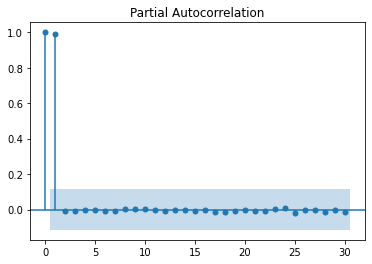

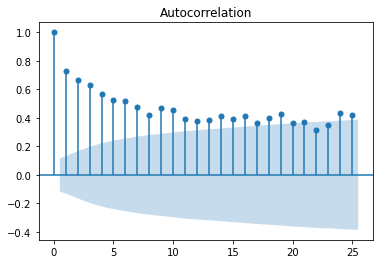

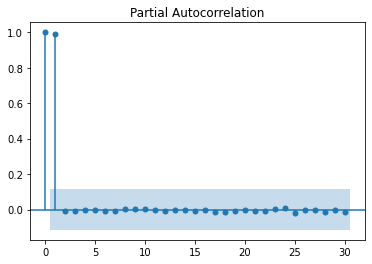

In [27]:

plot_acf((pre_cov_gdp['GDP'] - pre_cov_gdp['GDP'].shift())[1:], lags=25)
plot_pacf(pre_cov_gdp['GDP'], lags=30)

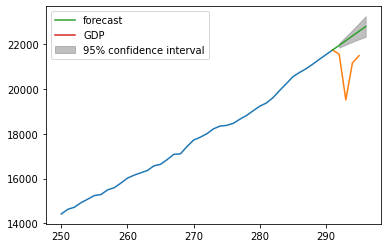

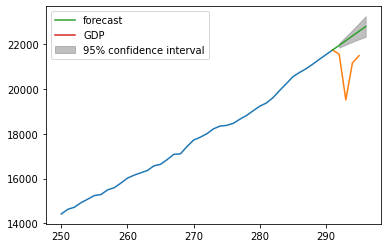

In [31]:
model = ARIMA(pre_cov_gdp['GDP'], order=(4,2,0) )
res = model.fit()
fig, ax = plt.subplots()
ax.plot(pre_cov_gdp['GDP'][250:])
ax.plot(gdp['GDP'][291:296])
res.plot_predict(291,296,ax=ax)

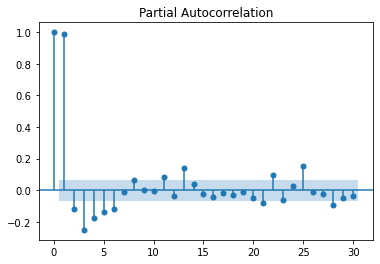

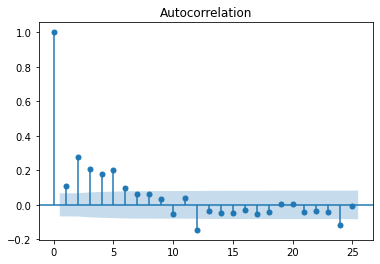

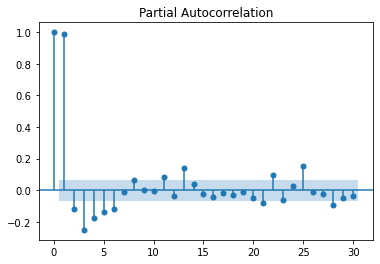

In [29]:
plot_acf((pre_cov_un['UNRATE'] - precov_un['UNRATE'].shift())[1:], lags=25)
plot_pacf(pre_cov_un['UNRATE'], lags=30)


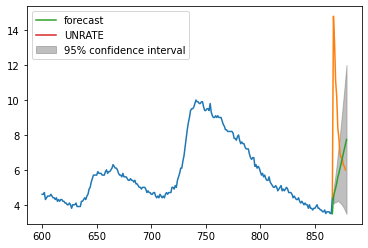

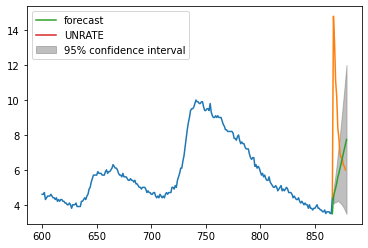

In [32]:
model = ARIMA(pre_cov_un['UNRATE'], order=(4,2,0) )
res = model.fit(disp=-1)
fig, ax = plt.subplots()
ax.plot(pre_cov_un['UNRATE'][600:])
ax.plot(unemp_df['UNRATE'][866:879])
res.plot_predict(866,879,ax=ax)

2- Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

In [33]:

def test_stationarity(timeseries, window=12):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    return dfoutput

In [43]:
df_1 = gdp.set_index(gdp['DATE'])
df_1

,DATE,GDP
DATE,,
1947-01-01,1947-01-01,243.164
1947-04-01,1947-04-01,245.968
1947-07-01,1947-07-01,249.585
1947-10-01,1947-10-01,259.745
1948-01-01,1948-01-01,265.742
...,...,...
2019-10-01,2019-10-01,21747.394
2020-01-01,2020-01-01,21561.139
2020-04-01,2020-04-01,19520.114


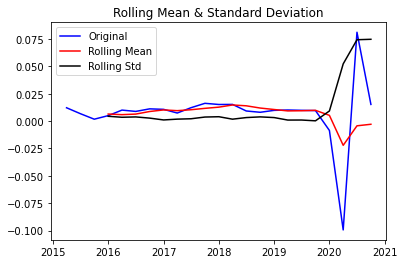

Results of Dickey-Fuller Test:


Test Statistic                 -0.205765
p-value                         0.937831
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64

In [46]:
# 2020
df = gdp.iloc[gdp.index > '2015']
#df = df.iloc[df.index <= '2021']
df.index = pd.to_datetime(df.index)
df = np.log(df)
df = df - df.shift()
df.dropna(inplace = True)

test_stationarity(df, window=4)

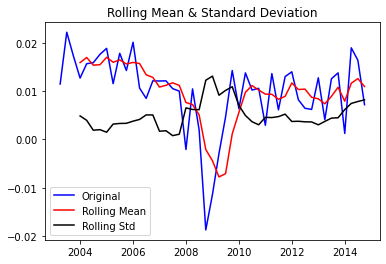

Results of Dickey-Fuller Test:


Test Statistic                 -3.781091
p-value                         0.003107
#Lags Used                      0.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64

In [48]:
# 2008
df = gdp.iloc[gdp.index > '2003']
df = df.iloc[df.index <= '2015']
df.index = pd.to_datetime(df.index)
df = np.log(df)
df = df - df.shift()
df.dropna(inplace = True)

test_stationarity(df, window=4)

